# **Einleitung**
In unserem Projekt wollen wir verschiedene Videos zu einem Bild einfrieren können. Dabei soll die Bewegung von Objekten, die im Laufe des Videos gezeigt werden, in dem Bild sichtbar sein. Dabei haben wir uns zu Beginn überlegt, welche Einschränkungen wir bezüglich der Videos festlegen und inwiefern man das Ziel am besten umsetzen könnte. Demnach haben wir nach Beispielen gesucht, die zeigen, wie wir uns unser Endprodukt vorstellen.

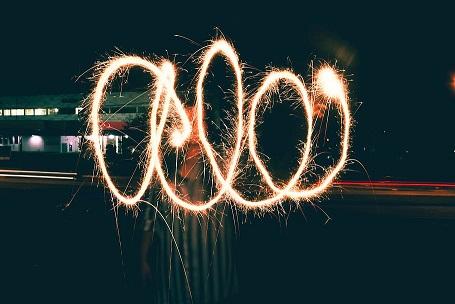

Das Zeichnen mit der Wunderkerze war ein Beispiel, an das wir direkt gedacht haben. In dem Bild ist gut zu erkennen, was unser Ziel im Laufe des Projekts ist. Hier sieht man nämlich ganz genau, wie die Person sich bewegt, bzw. was für ein Muster sie mit der Wunderkerze zieht.

# **Anfang**
Zu Beginn kommen unsere Imports, die wir im Laufe des Projekts verwendet haben.

In [1]:
#import opencv and open video stream
import urllib.request
import cv2
import numpy as np
from random import random as rand
from google.colab.patches import cv2_imshow

Als nächstes haben wir nach ein paar Videos gesucht, die wir im folgenden aufgelistet haben. Dabei ist uns aufgefallen, dass wir einige Einschränkungen festlegen sollten, um demnach nicht alle Videos zu bearbeiten. Die folgenden Videos haben wir dann als eine Video-Datei abgespeichert und diese zudem leicht austauschbar gehalten.

In [2]:
#Download video
url = 'https://previews.customer.envatousercontent.com/h264-video-previews/0888dd36-1a5b-4e5b-9fbf-e7bca069d213/16602591.mp4'
url2 = 'https://media.istockphoto.com/videos/male-dancer-in-studio-shows-ballerina-spin-video-id929138872'
url3 = 'https://media.istockphoto.com/videos/baseball-batter-hitting-ball-during-game-video-id640837234'
url4 = 'https://media.istockphoto.com/videos/modern-dancer-girl-in-white-dress-starts-dancing-contemporary-on-video-id516645076'
#url5 = Geometry
url5 = 'https://media.istockphoto.com/videos/abstract-logo-promo-pattern-of-circles-with-the-effect-of-white-video-id1220546660'
file = 'test2_video.mp4'
urllib.request.urlretrieve(url3,file)

('test2_video.mp4', <http.client.HTTPMessage at 0x7f0c4684e090>)

Da wir nur begrenzt Zeit haben, müssen wir unser Projekt einschränken. Folgende Einschränkungen haben wir festgehalten:


*   Fester Hintergrund/keine Kamerabewegung
*   Unterschiedliche Farbwerte
*   Möglichst einfarbiger Hintergrund

In unseren Videos sind sowohl passende, als auch unpassende Videos, um so einen Vergleich zu erhalten.

# Langezeitbeleuchtung

Nachdem wir nun einige Beispielvideos gefunden haben, haben wir überlegt, wie wir am besten anfangen könnten. Zu Beginn unserer Projekts haben wir dabei schon einige Ideen festgehalten. Unsere erste Idee war die Langzeitbeleuchtung. Damit wollten wir uns zuerst beschäftigen, da diese Methode unserer Meinung nach genau zu unseren Einschränkungen passt und demnach die passenden Voraussetzungen für ein optimales Ergebnis vorhanden sind. Dafür haben wir die Frames des Videos in einem Array abgespeichert. Daraus haben wir dann den Durchschnitt berechnet und als Bild ausgegeben.

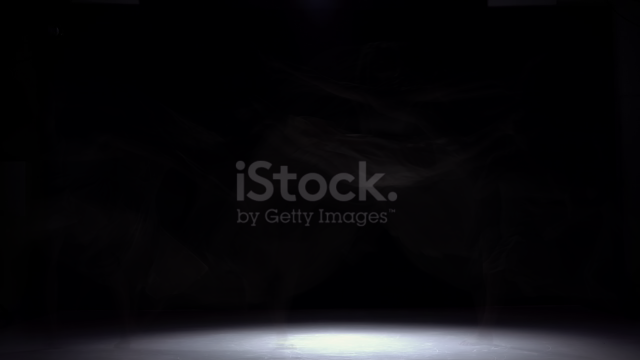

In [ ]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images = []
#b,g,r = cv2.split(frame)
for i in range(frame_count-1):
    _, frame = stream.read()
    images.append(frame)
    if rand()*40>39:
        for j in range(10):
            images.append(frame)

avg_img = np.mean(images, axis=0)
avg_img = avg_img.astype(np.uint8)
cv2_imshow(avg_img)

Dabei haben wir bei einigen Videos positive und bei anderen negative Ergebnisse erhalten.
Bei dem dritten Video-Link haben wir ein eher positives Ergebnis erhalten. In dem Video schlägt ein Baseballspieler einen Ball. 

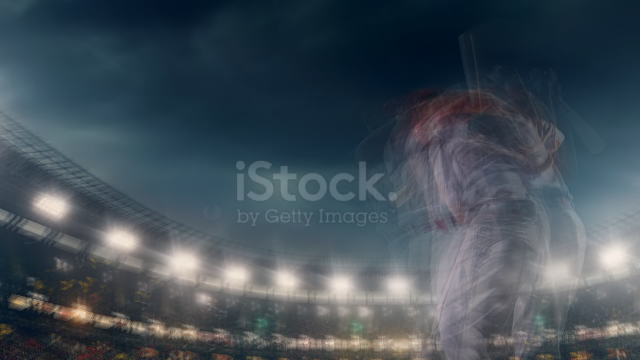

In dem Bild ist die Bewegung des Spielers gut zu erkennen. Dadurch waren wir positiv überrascht, da der Spieler in dem Video das primäre Objekt war. Jedoch ist der Ball kaum zu erkennen und der Hintergrund verschwommen, da beispielsweise die Lichter sich ebenfalls bewegt haben. Demnach waren wir noch nicht ganz zufrieden mit dem Ergebnis.

Als negatives Beispiel ist uns der vierte Link aufgefallen. In diesem Video springt eine Tänzerin quer durch das Bild.

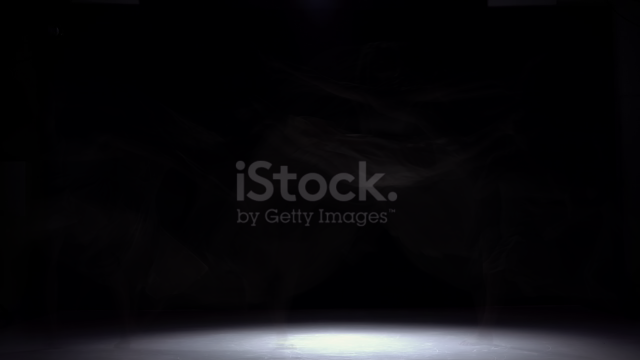

Dabei ist uns schnell aufgefallen, dass unsere Methode für dieses Video ungeeignet ist. Viele Bereiche das Videos waren die meiste Zeit unbeleuchtet, da das Objekt nur einmal von rechts nach links gesprungen ist. Dadurch ist in den meisten Teilen des Bildes nichts zu erkennen. Man sieht nur einen leichten Schleier in der Mitte des Bildes. Das Ergebnis war zu vermuten, jedoch war das Video passend zu unseren Einschränkungen, weshalb wir nach einer weiteren Methode suchen mussten.

# Background Subtraction

Die nächste Methode ist die Background Subtraction. Die Background Subtraction ist eine Methode, um die bewegenden Objekte zu isolieren. Dabei werden die Elemente des Videos in Vorder- und Hintergrund getrennt. Die bewegenden Objekte bilden damit den Vordergrund. Bei der Langzeitbeleuchtung haben wir gemerkt, dass wir mehr Fokus auf das bewegende Objekt legen sollten. Dabei ist uns die Objekterkennung als erstes in den Sinn gekommen. Jedoch wollten wir uns nicht auf bestimmte Objekte festlegen. Wir wollen alle bewegenden Objekte des Videos wahrnehmen und im Bild darstellen können. Demnach ist die Background Subtraction die passende Methode für das weitere Vorgehen.

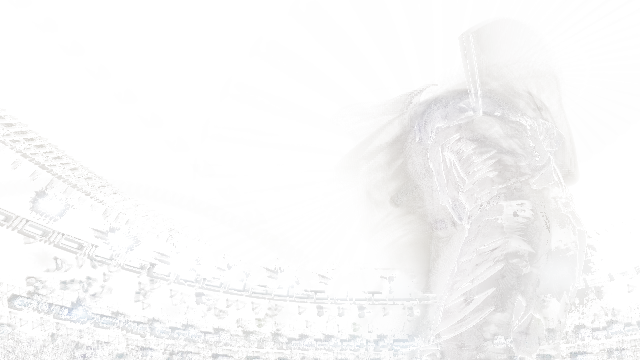

In [13]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images2 = []
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
for i in range(frame_count-1):
    _, frame = stream.read()
    fgmask = fgbg.apply(frame)
    rgba = cv2.cvtColor(frame, cv2.COLOR_RGB2BGRA)
    rgba[:, :, 3] = fgmask
    images2.append(rgba)
    
avg_img = np.mean(images2, axis=0)
avg_img = avg_img.astype(np.uint8)
cv2_imshow(avg_img)

#merged_img = cv2.addWeighted(firstframe, 0.4, avg_img, 5, 0)
#cv2.imwrite('test3.png', merged_img)

In dem Ergebnis sind nun die bewegenden Objekte erkennbar, da wir den Hintergrund transparent gemacht haben. Je nach Gewichtung erhält man zudem ein besseres oder schlechteres Bild. Diese Maske muss nun noch weiterverarbeitet werden.

# Einfache test

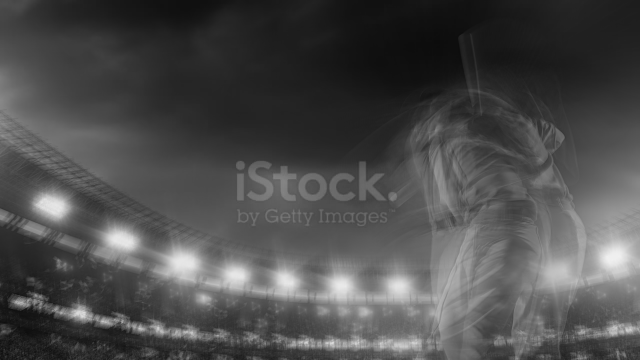

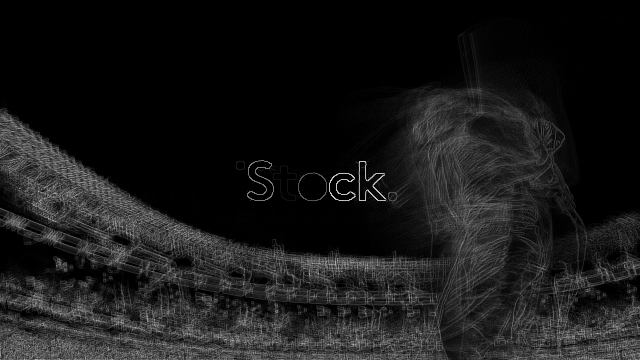

In [ ]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images3 = []
images4 = []
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
for i in range(frame_count-1):
    _, frame = stream.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    images3.append(gray)
    edged = cv2.Canny(gray,30,200)
    images4.append(edged)
avg_img3 = np.mean(images3, axis=0)
avg_img = avg_img.astype(np.uint8)
avg_img4 = np.mean(images4, axis=0)
cv2_imshow(avg_img3)
cv2_imshow(avg_img4)

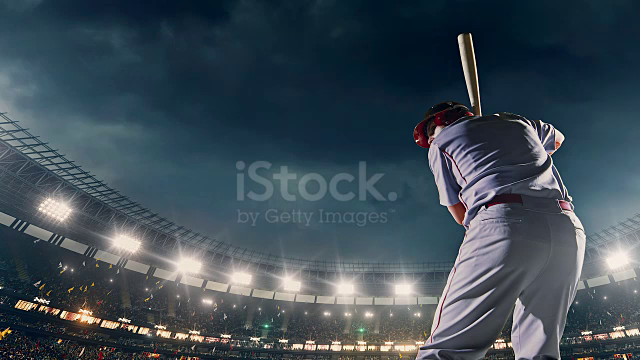

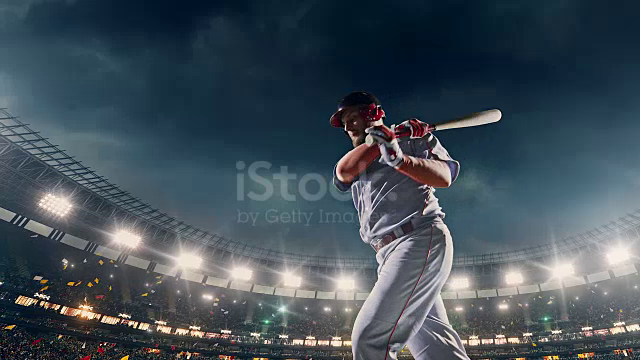

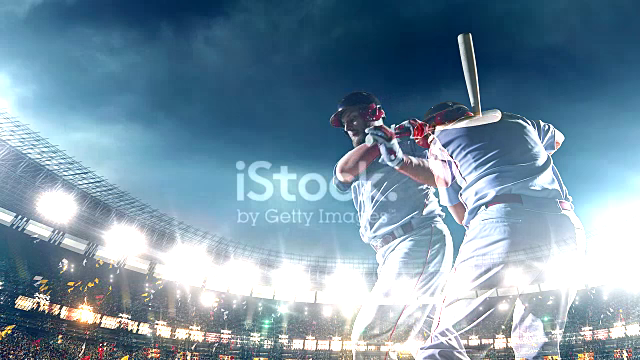

In [12]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images1 = []
for i in range(frame_count-1):
    _, frame = stream.read()
    images1.append(frame)
img2 = images1[frame_count-2]
cv2_imshow(firstframe)
cv2_imshow(img2)
img3 = cv2.add(firstframe, img2)
cv2_imshow(img3)